# Exploratory Data Analysis - Boarding and Accomodation Dataset

####  - Anitha Chandrakesan

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Understand and Preprocess Listing and Listing Brief data](#section3)
4. [Understand and Preprocess Reviews and Reviews Brief data](#section4)
5. [Understand and Preprocess Calendar data](#section5)
6. [Understand and Preprocess Neighbourhoods data](#section6)
7. [Insights](#section7)
    - 7.1 [Analyse Correlation in the dataset](#section7.1)<br/> 
    - 7.2 [Distribution of Price for listings](#section7.2)<br/>
    - 7.3 [Price vs Number of Bathrooms](#section7.3)<br/>
    - 7.4 [Price vs Number of Bedrooms](#section7.4)<br/>
    - 7.5 [Price vs Number of Beds](#section7.5)<br/>
    - 7.6 [Price vs Number of person a listing can accomodate](#section7.6)<br/>
    - 7.7 [Top 10 neighbourhood places that has good ratings](#section7.7)<br/>
    - 7.8 [How does ratings influence price  ? ](#section7.8)<br/>
    - 7.9 [Which City has more price  ? ](#section7.9)<br/>
    - 7.10 [Super Host Vs Review Rating](#section7.10)<br/>
    - 7.11 [Property Type vs Price](#section7.11)<br/>
    - 7.12 [Property Type vs Availability in 30 days](#section7.12)<br/>
    - 7.13 [Super Host Response Time](#section7.13)<br/>
    - 7.14 [Review Comments Analysis using word cloud](#section7.14)<br/>
    - 7.15 [Top 10 Reviewer](#section7.15)<br/>
    
    
    
    
  
    
 
    
    
 
    
    
    
    
    
    


## 1. Problem Statement  <a class="anchor" id="section1">

To exploring the boarding and accommodation trends in the city of San Diego,
California, United States and identify the key drivers/metrics.

### Import Packages

In [172]:
import numpy as np                  # Implemennts milti-dimensional array and matrices
import pandas as pd                 # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

## 2. Data Loading and Description <a class="anchor" id="section2">

In [173]:
listings = pd.read_csv('C:\\Users\\admin\\Desktop\\CM Data Scientist Hiring\\listings.csv')
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,f,strict_14_with_grace_period,f,f,1,1.18
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,NaN


In [174]:
listings_brief = pd.read_csv('C:\\Users\\admin\\Desktop\\CM Data Scientist Hiring\\listings_brief.csv')
listings_brief.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6,Large Craftsmen w/ yard ~ Perfect for families,29,Sara,NaN,North Hills,32.753993,-117.129705,Entire home/apt,295,2,149,2018-10-07,1.18,1,20
1,5570,Ocean front condo on the sand,8435,Jef Karchin'S MISSIONBEACHRETREAT,NaN,Mission Bay,32.784304,-117.252578,Entire home/apt,2050,3,0,NaN,NaN,2,328


In [175]:
reviews = pd.read_csv('C:\\Users\\admin\\Desktop\\CM Data Scientist Hiring\\reviews.csv')
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6,8,2008-06-22,415,Terrence,Sara is an awesome hostess. She was very cons...
1,6,4383,2009-06-22,3762,Christine,My stay at “Craftsmen” was wonderful! Sara wa...


In [176]:
reviews_brief = pd.read_csv('C:\\Users\\admin\\Desktop\\CM Data Scientist Hiring\\reviews_brief.csv')
reviews_brief.head(2)

,listing_id,date
0,6,2008-06-22
1,6,2009-06-22


In [177]:
neighbourhoods = pd.read_csv('C:\\Users\\admin\\Desktop\\CM Data Scientist Hiring\\neighbourhoods.csv')
neighbourhoods.head(2)

,neighbourhood_group,neighbourhood
0,NaN,Allied Gardens
1,NaN,Alta Vista


In [178]:
calendar = pd.read_csv('C:\\Users\\admin\\Desktop\\CM Data Scientist Hiring\\calendar.csv')
calendar.head(2)

,listing_id,date,available,price
0,635756,2019-11-14,t,$67.00
1,292285,2019-11-14,f,NaN


##### Number of records in each dataset

In [179]:
print("listings ",listings.shape)
print("listings_brief ",listings_brief.shape)
print("reviews ",reviews.shape)
print("reviews_brief ",reviews_brief.shape)
print("neighbourhoods ",neighbourhoods.shape)
print("calendar ",calendar.shape)

listings  (11922, 96)
listings_brief  (11922, 16)
reviews  (344404, 6)
reviews_brief  (344404, 2)
neighbourhoods  (108, 2)
calendar  (4351530, 4)


## 3. Understand and Preprocess Listing and Listing Brief data <a class="anchor" id="section3">

We will try to get Detailed information about each column by profiling

In [180]:
profile = pandas_profiling.ProfileReport(listings)
profile.to_file(outputfile="listings_preprocessing.html")

__Information gathered from Profile report__

Number of variables = 96 <br>
Number of observations	= 11922 <br>
Numeric =	27 <br>
Categorical = 55 <br>
Total Missing (%)= 15.6% <br>

experiences_offered has constant value none, can be ignored <br>
has_availability has constant value t, can be ignored<br>
host_acceptance_rate has constant value, can be ignored<br>
host_total_listings_count is highly correlated with host_listings_count<br>
is_business_travel_ready has constant value f, can be ignored <br>
medium_url has constant value, can be ignored<br>
neighbourhood_group_cleansed has 100.0% missing values<br>
requires_license has constant value f, can be ignored<br>
scrape_id has constant value, can be ignored<br>
thumbnail_url has constant value, can be ignored<br>
xl_picture_url has constant value, can be ignored<br>

In [181]:
listings.drop(columns=['experiences_offered','has_availability','host_acceptance_rate','host_total_listings_count','is_business_travel_ready','medium_url',"neighbourhood_group_cleansed","requires_license","scrape_id","thumbnail_url","xl_picture_url"],inplace= True)

In [182]:
listings.describe()

,id,host_id,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,1.192200e+04,1.192200e+04,11916.000000,11755.000000,11922.000000,11922.000000,11922.000000,11918.000000,11917.000000,11914.000000,...,9629.000000,9623.000000,9627.000000,9612.000000,9621.000000,9609.000000,9607.000000,4.800000e+01,11922.00000,9759.000000
mean,1.728569e+07,6.085778e+07,40.532561,92055.856572,32.770292,-117.181854,4.297182,1.480156,1.598641,2.309048,...,95.263994,9.706329,9.589903,9.833437,9.820809,9.751067,9.519933,9.749303e+07,10.32612,1.935757
std,8.205400e+06,5.850494e+07,188.505044,1743.770386,0.065639,0.064335,2.906190,0.880883,1.190178,1.831207,...,6.874241,0.696525,0.794416,0.577590,0.593369,0.579499,0.791108,3.547929e+08,26.20795,2.056274
min,6.000000e+00,2.900000e+01,0.000000,12345.000000,32.532614,-117.281401,1.000000,0.000000,0.000000,0.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.056300e+05,1.00000,0.010000
25%,1.159462e+07,1.224305e+07,1.000000,92101.000000,32.726506,-117.245726,2.000000,1.000000,1.000000,1.000000,...,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,6.069060e+05,1.00000,0.360000
50%,1.859936e+07,3.869078e+07,2.000000,92107.000000,32.759515,-117.168460,4.000000,1.000000,1.000000,2.000000,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.239040e+05,2.00000,1.140000
75%,2.403747e+07,9.505083e+07,7.000000,92110.000000,32.799578,-117.141241,6.000000,2.000000,2.000000,3.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.268865e+05,5.00000,2.950000
max,3.004997e+07,2.251816e+08,2488.000000,92663.000000,33.086065,-116.933520,40.000000,27.500000,25.000000,23.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.011643e+09,161.00000,18.950000


#####  Find Null values in the dataset

In [183]:
listings.isnull().sum()

id                                      0
listing_url                             0
last_scraped                            0
name                                    2
summary                               413
space                                3160
description                           153
neighborhood_overview                4329
notes                                5652
transit                              4842
access                               4366
interaction                          4601
house_rules                          3462
picture_url                             0
host_id                                 0
host_url                                0
host_name                               6
host_since                              6
host_location                          56
host_about                           3976
host_response_time                   4013
host_response_rate                   4013
host_is_superhost                       6
host_thumbnail_url                

##### Dropping the columns that has more than 90% null values

In [184]:
drop_cols=[]
for cols in listings.columns:
    if listings[cols].isnull().sum() >10000:
        drop_cols.append(cols)
print("Number of  columns to be dropped: ", len(drop_cols))
print(drop_cols)
listings.drop(drop_cols,axis=1, inplace = True)

Number of  columns to be dropped:  4
['square_feet', 'weekly_price', 'monthly_price', 'license']


In [185]:
listings.drop(columns=['last_scraped'],inplace= True)

Replace the $ dollar symbol in price

In [186]:
listings['price'] = listings['price'].replace('[\$,]','',regex=True).astype(float)

In [187]:
listings_brief.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.192200e+04,1.192200e+04,0.0,11922.000000,11922.000000,11922.000000,11922.000000,11922.000000,9759.000000,11922.00000,11922.000000
mean,1.728569e+07,6.085778e+07,NaN,32.770292,-117.181854,212.707851,4.653162,28.900436,1.935757,10.32612,152.486412
std,8.205400e+06,5.850494e+07,NaN,0.065639,0.064335,306.991755,14.482572,51.470547,2.056274,26.20795,131.039167
min,6.000000e+00,2.900000e+01,NaN,32.532614,-117.281401,0.000000,1.000000,0.000000,0.010000,1.00000,0.000000
25%,1.159462e+07,1.224305e+07,NaN,32.726506,-117.245726,80.000000,1.000000,1.000000,0.360000,1.00000,22.000000
50%,1.859936e+07,3.869078e+07,NaN,32.759515,-117.168460,130.000000,2.000000,8.000000,1.140000,2.00000,132.000000
75%,2.403747e+07,9.505083e+07,NaN,32.799578,-117.141241,249.000000,3.000000,33.000000,2.950000,5.00000,287.000000
max,3.004997e+07,2.251816e+08,NaN,33.086065,-116.933520,10000.000000,500.000000,686.000000,18.950000,161.00000,365.000000


In [188]:
listings_brief.isnull().sum()

id                                    0
name                                  2
host_id                               0
host_name                             6
neighbourhood_group               11922
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2160
reviews_per_month                  2163
calculated_host_listings_count        0
availability_365                      0
dtype: int64

neighbourhood_group has all null values

In [189]:
listings_brief.drop(columns=['neighbourhood_group'],inplace= True)

In [190]:
listings_brief.shape

(11922, 15)

Merge Listing and Listings brief

In [191]:
listing = pd.merge(listings, listings_brief)
listing.shape

(5327, 80)

In [192]:
listing.head(1)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,54001,https://www.airbnb.com/rooms/54001,"La Jolla Peaceful: Sitting Room, Breakfast",NaN,The Peaceful is one of two bedrooms in the de...,The Peaceful is one of two bedrooms in the de...,"Tranquility, stately trees, meditative, zen-fu...",Also on Airbnb and available at the same prope...,If you are debating between renting a car or '...,All common areas.,...,10.0,10.0,10.0,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,flexible,f,t,4,1.82


In [193]:
listing.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availabili

In [194]:
listing.city.unique()

array(['La Jolla', 'San Diego', 'La Jolla ', 'Del Mar', 'San Diego ',
       'Ocean Beach', 'la jolla', 'San diego', 'La jolla',
       'Ocean Beach, San Diego', 'LA JOLLA', 'La Jolla, San Diego',
       'La Mesa', 'Alpine', 'SAN DIEGO', 'Del Mar Highlands ',
       'San Diego, California, US', 'سان دييغو', 'Pacific Beach',
       ' La Jolla', 'La Jolla Shores', 'Newport Beach',
       'Gas lamp San Diego', 'Pacific Beach ', 'National City', 'CA',
       'Solana Beach'], dtype=object)

In [195]:
listing.city.replace( 'La Jolla ', 'La Jolla',inplace = True)
listing.city.replace( 'la jolla', 'La Jolla',inplace = True)
listing.city.replace( 'La jolla', 'La Jolla',inplace = True)
listing.city.replace( 'LA JOLLA', 'La Jolla',inplace = True)
listing.city.replace( 'La Jolla, San Diego', 'La Jolla',inplace = True)
listing.city.replace( 'La Jolla Shores', 'La Jolla',inplace = True)
listing.city.replace( ' La Jolla', 'La Jolla',inplace = True)
listing.city.replace( 'SAN DIEGO', 'San Diego',inplace = True)
listing.city.replace( 'San Diego, California, US', 'San Diego',inplace = True)
listing.city.replace( 'San Diego ', 'San Diego',inplace = True)
listing.city.replace( 'San diego ', 'San Diego',inplace = True)
listing.city.replace( 'Ocean Beach, San Diego', 'Ocean Beach',inplace = True)
listing.city.replace( 'San diego', 'San Diego',inplace = True)
listing.city.replace( 'Pacific Beach ', 'Pacific Beach',inplace = True)
listing.city.replace( 'Del Mar Highlands ', 'Del Mar',inplace = True)
listing.city.unique()

array(['La Jolla', 'San Diego', 'Del Mar', 'Ocean Beach', 'La Mesa',
       'Alpine', 'سان دييغو', 'Pacific Beach', 'Newport Beach',
       'Gas lamp San Diego', 'National City', 'CA', 'Solana Beach'],
      dtype=object)

## 4. Understand and Preprocess Reviews and  Reviews Brief data <a class="anchor" id="section4">

In [196]:
reviews.shape

(344404, 6)

In [197]:
reviews.describe()

,listing_id,id,reviewer_id
count,3.444040e+05,3.444040e+05,3.444040e+05
mean,1.199821e+07,1.928888e+08,7.065055e+07
std,7.757898e+06,9.756966e+07,5.895252e+07
min,6.000000e+00,8.000000e+00,2.900000e+01
25%,5.134312e+06,1.129082e+08,2.087317e+07
50%,1.234723e+07,2.025160e+08,5.429442e+07
75%,1.843056e+07,2.767584e+08,1.127640e+08
max,2.998096e+07,3.502478e+08,2.258349e+08


In [198]:
reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         417
dtype: int64

In [199]:
reviews_brief.shape

(344404, 2)

In [200]:
reviews_brief.isnull().sum()

listing_id    0
date          0
dtype: int64

Reviews brief is redundant of reviews so ignoring the data

## 5. Understand and Preprocess Calendar data <a class="anchor" id="section5">

In [201]:
calendar.shape

(4351530, 4)

In [202]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price         2533587
dtype: int64

Price having 50% null values

In [203]:
calendar['price'] = calendar['price'].replace('[\$,]','',regex=True).astype(float)

In [204]:
calendar.price.mode()

0    99.0
dtype: float64

Replacing null values with mode

In [205]:
calendar["price"].fillna(calendar["price"].mode()[0], inplace=True)

In [206]:
calendar.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

## 6. Understand and Preprocess Neighbourhoods data <a class="anchor" id="section6">

In [207]:
neighbourhoods.shape

(108, 2)

In [208]:
neighbourhoods.isnull().sum()

neighbourhood_group    108
neighbourhood            0
dtype: int64

In [209]:
neighbourhoods.neighbourhood_group.unique()

array([nan])

Neighbourhoods data has all null value in neighbourhood_group, hence ignoring the data as we cannot deduce much information from it and using __neighbourhood data from listings__           

## 7. Insights <a class="anchor" id="section7">

### 7.1 Analyse Correlation in the dataset <a class="anchor" id="section7.1">

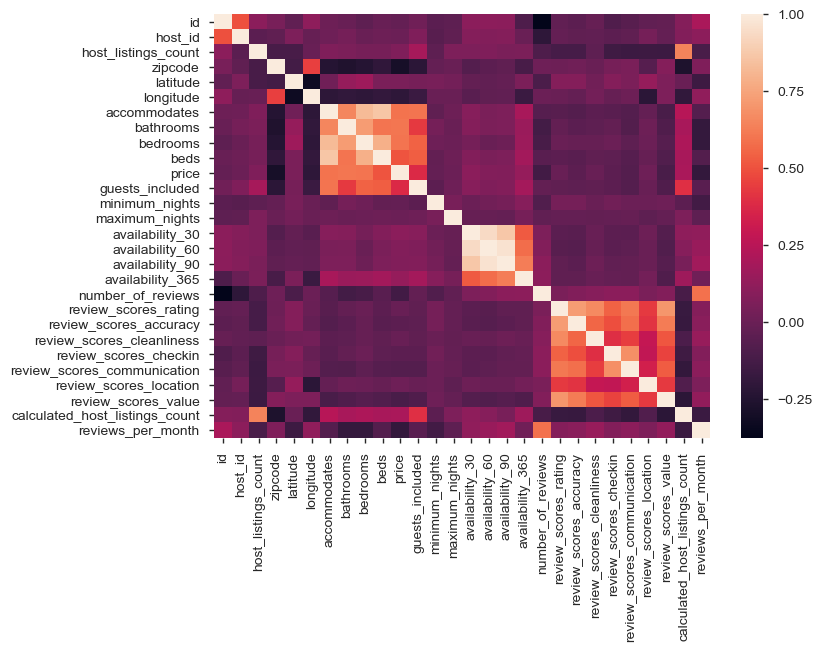

In [210]:
sns.heatmap(listing.corr())

There are several metrics that have (not so) strong correlation and Price is correlated with Number of Bedroom, bathroom, Beds, Availability

### 7.2 Distribution of Price for listings <a class="anchor" id="section7.2">

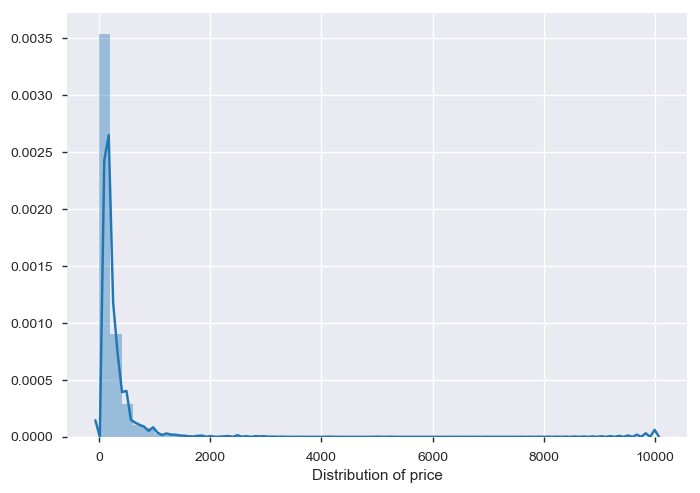

In [211]:
sns.distplot(listing["price"],axlabel="Distribution of price")

In [212]:
listing.price.mean()

222.44659282898442

Mean price is $222 

Distribution of Price is __right Skewed__ with maximum price $10000 

### 7.3 Price vs Number of Bathrooms <a class="anchor" id="section7.3">

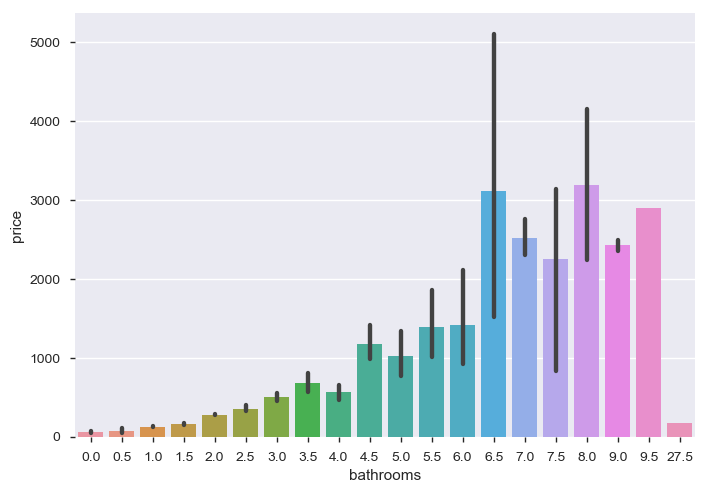

In [213]:
sns.barplot(x = listing.bathrooms, y = listing.price)

More the Number of bathrooms more the price with 6.5, 8, 9.5 bathrooms has highest price

### 7.4 Price vs Number of Bedrooms <a class="anchor" id="section7.4">

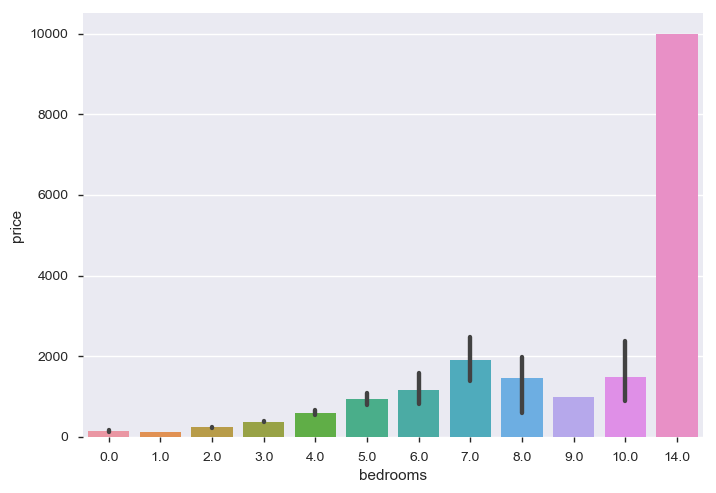

In [214]:
sns.barplot(x = listing.bedrooms, y = listing.price)

Having 7 bedrooms can yeild high profit

### 7.5 Price vs Number of Beds <a class="anchor" id="section7.5">

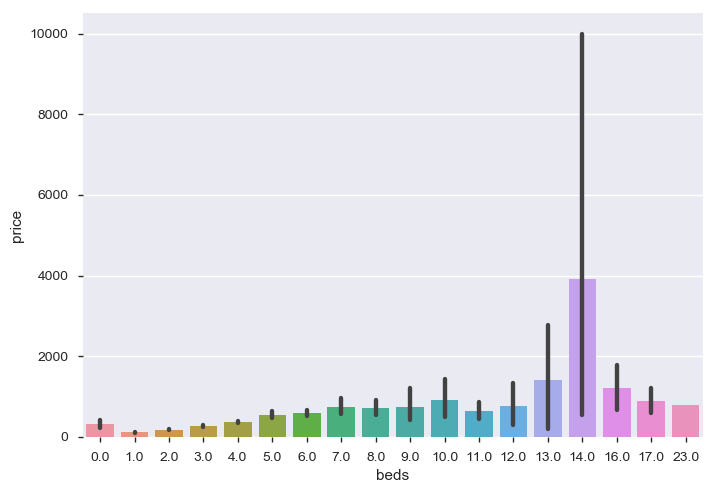

In [215]:
sns.barplot(x = listing.beds, y = listing.price)

Listings having 13,14 beds are charged high price

### 7.6 Price vs Number of person a listing can accomodate <a class="anchor" id="section7.6">

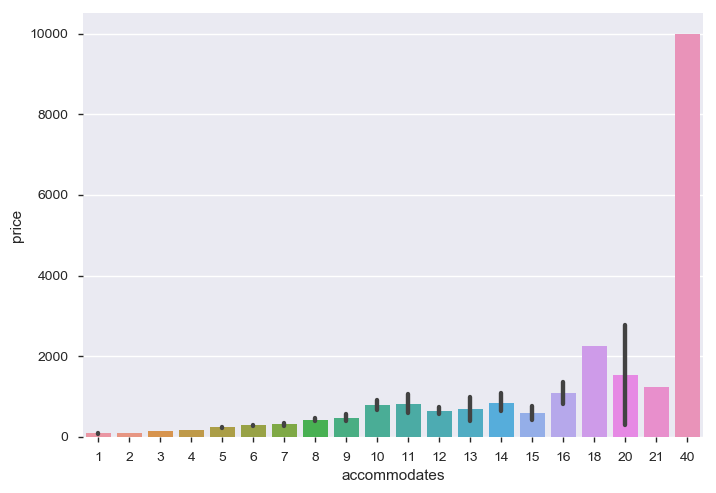

In [216]:
sns.barplot(x = listing.accommodates, y = listing.price)

As Number of accomodates increase, price also increase

### 7.7 Top 10 neighbourhood places that has good ratings <a class="anchor" id="section7.7">

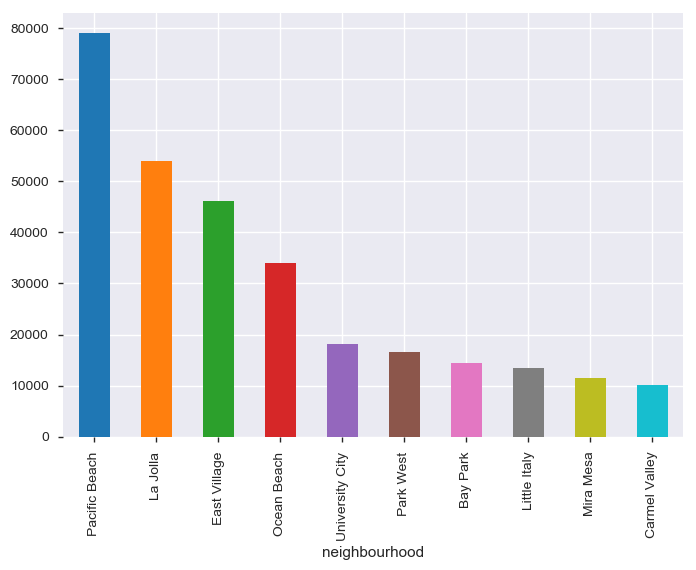

In [217]:
listing.groupby("neighbourhood")["review_scores_rating"].sum().sort_values(ascending=False).head(10).plot(kind="bar")

### 7.8 How does ratings influence price  ? <a class="anchor" id="section7.8">

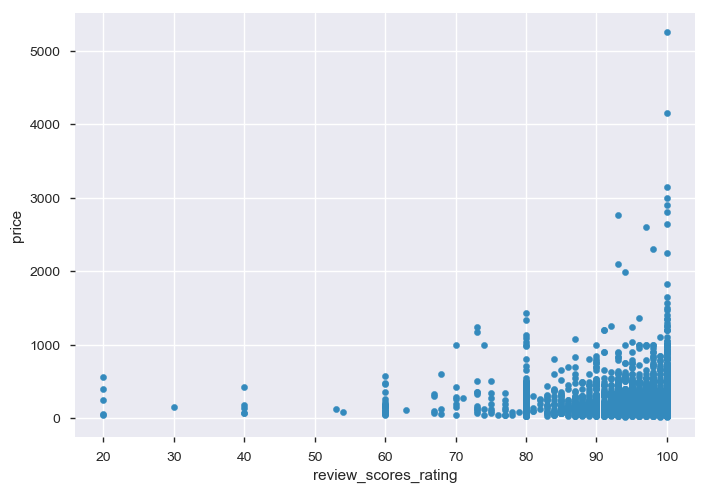

In [218]:
listing.plot.scatter(y='price', x='review_scores_rating')

As review rating increases, price gets increase

### 7.9 Which City has more price  ? <a class="anchor" id="section7.9">

In [219]:
listing.groupby("city")["price"].sum().reset_index().sort_values('price', ascending=False).head(10)

,city,price
10,San Diego,1003508.0
4,La Jolla,149662.0
2,Del Mar,25557.0
12,سان دييغو,2500.0
8,Ocean Beach,855.0
9,Pacific Beach,828.0
5,La Mesa,758.0
0,Alpine,462.0
1,CA,258.0
7,Newport Beach,221.0


### 7.10 Super Host Vs Review Rating <a class="anchor" id="section7.10">

In [220]:
super_rating=listing.groupby("host_is_superhost")["review_scores_rating"].sum()
super_rating

host_is_superhost
f    256954.0
t    154503.0
Name: review_scores_rating, dtype: float64

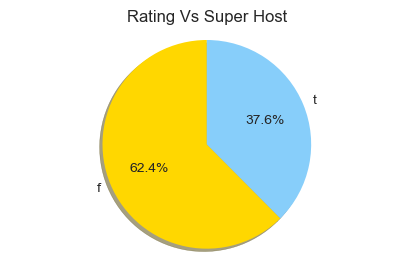

In [221]:
labels=np.array(super_rating.index)
sizes = super_rating.values
colors = ['gold', 'lightskyblue']

# Plot
plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Rating Vs Super Host')
plt.axis('equal')
plt.show()

Super Host has more rating compared to regular host

### 7.11 Property Type vs Price <a class="anchor" id="section7.11">

In [222]:
listing.property_type.unique()

array(['House', 'Guesthouse', 'Guest suite', 'Townhouse', 'Apartment',
       'Condominium', 'Bungalow', 'Cottage', 'Loft', 'Treehouse',
       'Serviced apartment', 'Bed and breakfast', 'Hostel', 'Villa',
       'Cabin', 'Camper/RV', 'Other', 'Boutique hotel', 'Tiny house',
       'Castle', 'Earth house', 'Tent', 'Resort', 'Igloo', 'Boat',
       'Campsite', 'Hotel', 'Aparthotel'], dtype=object)

In [223]:
listing.groupby("property_type")["price"].sum().reset_index().sort_values('price', ascending=False).head(5)

,property_type,price
17,House,580320.0
1,Apartment,251146.0
10,Condominium,132585.0
25,Townhouse,58936.0
27,Villa,38233.0


__House __ has more price compared to other type of property

### 7.12 Property Type vs Availability in 30 days <a class="anchor" id="section7.12">

In [224]:
listing.groupby("property_type")["availability_30"].count().reset_index().sort_values('availability_30', ascending=False).head(5)

,property_type,availability_30
17,House,1936
1,Apartment,1551
10,Condominium,649
25,Townhouse,323
14,Guesthouse,148


House has more Availability in 30 days

### 7.13 Super Host Response Time <a class="anchor" id="section7.13">

In [225]:
superhost=listing[listing["host_is_superhost"]=="t"]

In [226]:
superhost.groupby("host_response_time")["id"].count()

host_response_time
within a day            41
within a few hours     177
within an hour        1120
Name: id, dtype: int64

Most of the Response time of superhost is __within Hour__

### 7.14 Review Comments Analysis using word cloud <a class="anchor" id="section7.14">

In [227]:
review=reviews["comments"].head(500)
review.shape

(500,)

In [228]:
from wordcloud import WordCloud, STOPWORDS

In [229]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in review: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

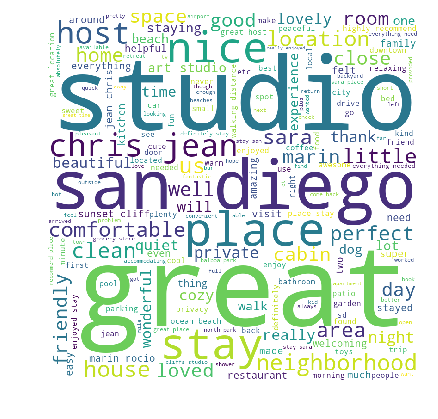

In [230]:
# plot the WordCloud image                        
plt.figure(figsize = (7, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Most of the review comments are __good and postive__

### 7.15 Top 10 Reviewer <a class="anchor" id="section7.15">

In [231]:
reviews.groupby("reviewer_id").count().sort_values(by="comments",ascending=False)["id"].head(10).reset_index(name='Comment counts')

,reviewer_id,Comment counts
0,64785633,42
1,23653867,40
2,169329871,36
3,139473190,33
4,1649820,29
5,118535408,29
6,4964473,26
7,30012680,24
8,157569393,24
9,85972988,23
